# overview of CSWOT23-DriX campaign


In [2]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.xarray

import pynsitu as pin
crs = pin.maps.crs

---
## load data

In [17]:
# load campaign object
cp = pin.Campaign("cswot23.yaml")

# plotting utils
kwargs_map = dict(extent=cp["lon"] + cp["lat"], bathy=cp["bathy"]["label"])

In [41]:
# drix
drix = cp.load("drix_underway_ctd_10s.nc").set_coords(["lon", "lat"])
drix_met = cp.load("drix_met_10s.nc")
drix_turb = cp.load("drix_turb_10s.nc").set_coords(["lon", "lat"])
#drix_ins = cp.load("drix_ins_10s.nc").sortby("time")

# meteo
#arome = cp.load("met_arome.nc")

# load drifters
#dr = cp.load("drifters.nc").to_dataframe()

# adcp
#def load_adcp(extension):
#    ds = cp.load(f"adcp_{extension}.nc")
#    ds = ds.assign_coords(z=-ds["range"])
#    return ds

#adcp_europe_gf = load_adcp("europe_GF")
#adcp_europe_pf = load_adcp("europe_PF")

#adcp_drix_gf = load_adcp("drix_GF")
#adcp_drix_pf = load_adcp("drix_PF")

---

## adcp

In [6]:
from glob import glob
from cswot_adcp import data_loader as loader

In [12]:
adcp_files = sorted(glob(os.path.join(cp["path_raw"], "ADCP/*.STA")))

In [47]:
def load_adcp(f):
    d = loader.read_data(f)
    d = d.assign_coords(z=-d.range)
    return d
D = [load_adcp(f) for f in adcp_files[:]]

In [20]:
dbin = 5
di = 4

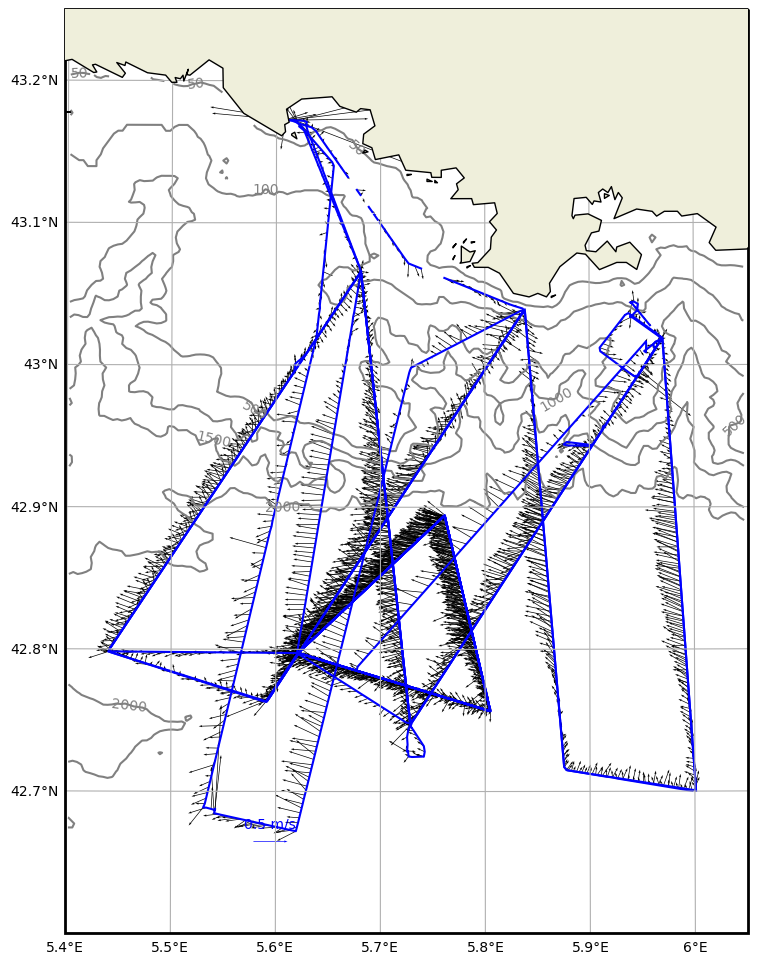

In [22]:
fig, ax, _ = cp.map(figsize=(12,12))

for ds in D:

    #add navigation
    ds = ds.isel(time=slice(0,None,di), range=dbin)

    
    x, y = ds.elongitude_gps, ds.elatitude_gps
    ax.plot(x, y, color="b", transform=crs)
    u, v = ds.compensated_E, ds.compensated_N

    #add quiver speed vectors
    q = ax.quiver(x=x, y=y, u=u, v=v, transform=crs, pivot="tail", scale=10,
                  width=1e-3,
                  )

#add quiver key
uref = 0.5
ax.quiverkey(q, 0.3, 0.1, uref, f'{uref} m/s', transform=crs, color="blue", labelcolor="blue",
             labelpos='N', coordinates='axes')

In [38]:
p = None
for d in D:
    np = d.reset_coords()["elatitude_gps"].hvplot(label="toto", )
    if p is None:
        p = np
    else:
        p = p*np
p

:Overlay
   .Curve.Toto.I      :Curve   [time]   (elatitude_gps)
   .Curve.Toto.II     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.III    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.IV     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.V      :Curve   [time]   (elatitude_gps)
   .Curve.Toto.VI     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.VII    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.VIII   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.IX     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.X      :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XI     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XII    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XIII   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XIV    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XV     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XVI    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XVII   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XVIII  :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XIX    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XX     :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXI    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXII   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXIII  :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXIV   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXV    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXVI   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXVII  :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXVIII :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXIX   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXX    :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXXI   :Curve   [time]   (elatitude_gps)
   .Curve.Toto.XXXII  :Curve   [time]   (elatitude_gps)

In [39]:
for i, d in enumerate(D):
    print(i, d.time[0].values, d.time[-1].values)

0 2023-04-17T05:59:16.024464000 2023-04-17T18:41:47.060000000
1 2023-04-17T18:42:15.010000000 2023-04-18T01:21:46.000000000
2 2023-04-18T01:22:21.014464000 2023-04-18T08:48:22.040000000
3 2023-04-18T08:48:47.004464000 2023-04-18T18:52:21.010000000
4 2023-04-18T18:54:38.004464000 2023-04-19T00:11:39.000000000
5 2023-04-19T00:11:52.004464000 2023-04-19T14:00:53.000000000
6 2023-04-19T16:10:22.014464000 2023-04-19T16:57:52.024464000
7 2023-04-19T17:01:16.060000000 2023-04-19T17:04:17.060000000
8 2023-04-19T17:04:37.004464000 2023-04-19T17:06:08.060000000
9 2023-04-19T17:07:50.000000000 2023-04-19T17:10:20.030000000
10 2023-04-19T17:10:49.010000000 2023-04-19T17:13:19.010000000
11 2023-04-19T17:13:54.030000000 2023-04-19T17:16:24.050000000
12 2023-04-19T17:16:37.010000000 2023-04-19T17:20:37.004464000
13 2023-04-19T17:21:07.050000000 2023-04-19T17:23:07.060000000
14 2023-04-19T17:23:42.000000000 2023-04-19T17:34:12.010000000
15 2023-04-19T17:40:56.000000000 2023-04-19T22:32:26.020000000
16

In [59]:
i=21
d = D[i]

list(d)

['vel',
 'amp',
 'corr',
 'prcnt_gd',
 'Ens',
 'pitch',
 'roll',
 'heading',
 'Tsd_depth',
 'c_sound',
 'salinity',
 'temp',
 'route',
 'vessel_speed',
 'Ens_gps',
 'compensated',
 'compensated_E',
 'compensated_N',
 'compensated_U',
 'compensated_err',
 'compensated_Mag',
 'compensated_Dir']

(array([ 2195.,  2861.,  2802.,  2374.,  2202.,  2231.,  2282.,  2917.,
         4690., 39566.]),
 array([ 11. ,  22.9,  34.8,  46.7,  58.6,  70.5,  82.4,  94.3, 106.2,
        118.1, 130. ]),
 <BarContainer object of 10 artists>)

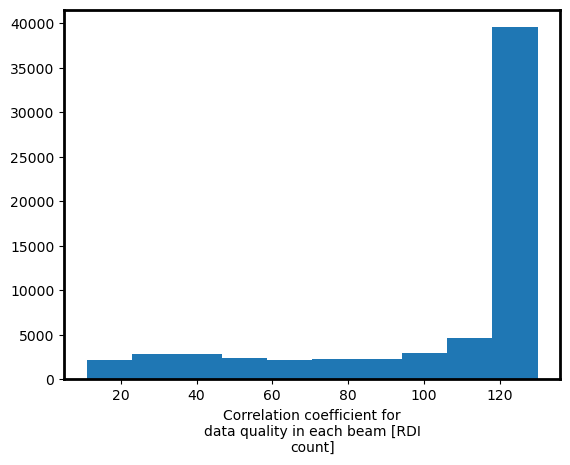

In [60]:
d["corr"].plot()

In [61]:
d = d.where(d["corr"].mean("beam")>100)

In [71]:
#d['prcnt_gd'].plot()

(-120.0, 0.0)

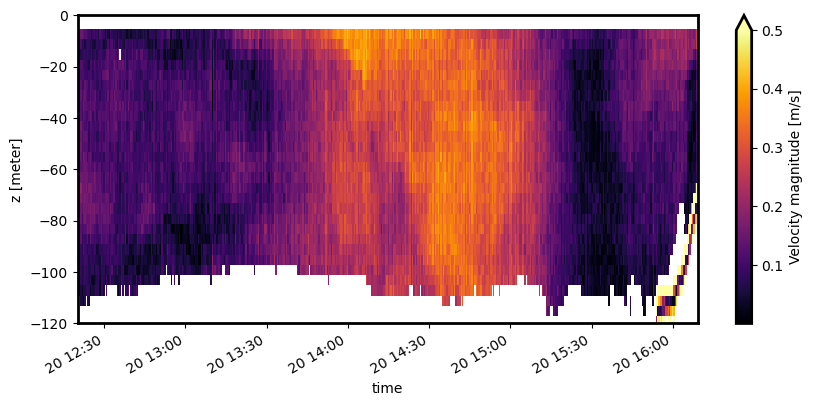

In [75]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
d["compensated_Mag"].plot(y="z", vmax=0.5, cmap="inferno", ax=ax)
ax.set_ylim(-120, 0)

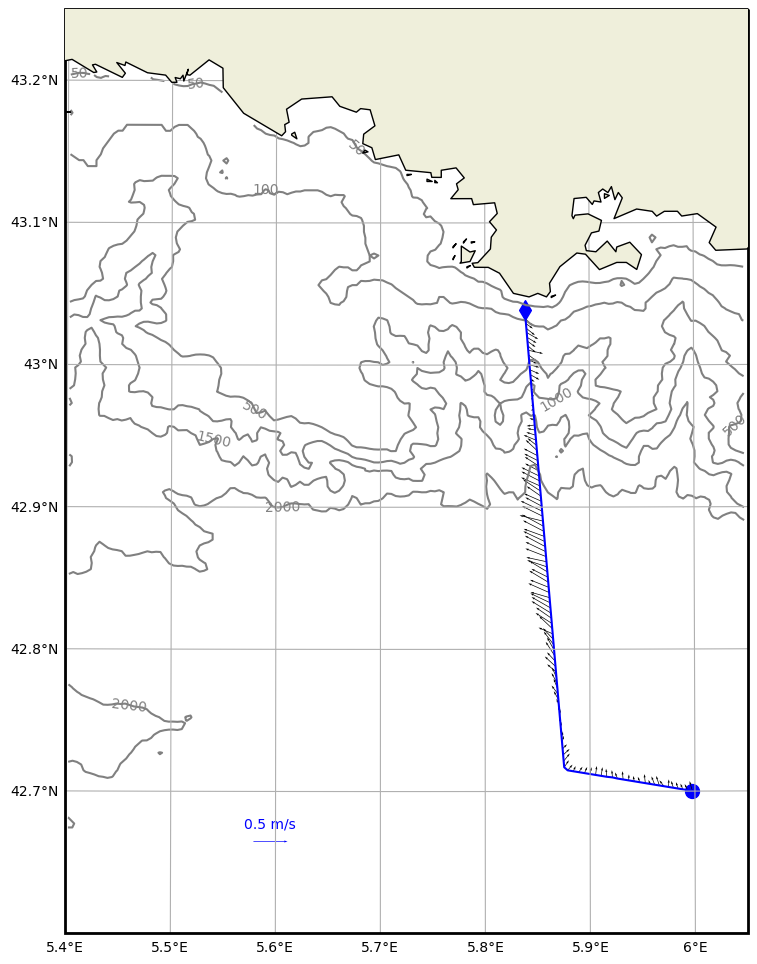

In [78]:
fig, ax, _ = cp.map(figsize=(12,12))

ds = d

#add navigation
ds = ds.isel(time=slice(0,None,di), range=dbin)

x, y = ds.elongitude_gps, ds.elatitude_gps
ax.plot(x, y, color="b", transform=crs)
u, v = ds.compensated_E, ds.compensated_N

ax.scatter(x[0], y[0], marker="o", color="b", s=100, transform=crs)
ax.scatter(x[-1], y[-1], marker="*", color="b", s=100, transform=crs)

#add quiver speed vectors
q = ax.quiver(x=x, y=y, u=u, v=v, transform=crs, pivot="tail", scale=10,
              width=1e-3,
              )

#add quiver key
uref = 0.5
ax.quiverkey(q, 0.3, 0.1, uref, f'{uref} m/s', transform=crs, color="blue", labelcolor="blue",
             labelpos='N', coordinates='axes')

In [ ]:
map_kw = dict(extent = [5.4, 6.05, 42.6, 43.25],
              coastline="10m", 
              bathy='C:\\Users\\globe\\cswot_python\\bathy.nc', 
              bathy_fill=False,
              bathy_levels=[100, 500, 1000, 2000],
              land="10m",
              figsize=(12,12),
             )

fig, ax, _ = pin.maps.plot_map(**map_kw)

for ds in D:

    #add navigation
    ds = ds.isel(time=slice(0,None,di), range=dbin)

    
    x, y = ds.elongitude_gps, ds.elatitude_gps
    ax.plot(x, y, color="b", transform=crs)
    u, v = ds.compensated_E, ds.compensated_N

    #add quiver speed vectors
    q = ax.quiver(x=x, y=y, u=u, v=v, transform=crs, pivot="tail", scale=10,
                  width=1e-3,
                  )

#add quiver key
uref = 0.5
ax.quiverkey(q, 0.3, 0.1, uref, f'{uref} m/s', transform=crs, color="blue", labelcolor="blue",
             labelpos='N', coordinates='axes')

In [ ]:
#adcp_drix_gf["E"].plot(y="z")
#adcp_europe_gf["E"].plot(y="z")
#adcp_europe_pf["E"].plot(y="z")

In [ ]:
# interpolate arome on DriX trajectory
# _u10 = arome.u10m.interp(longitude=europe_underway.long, latitude=europe_underway.long, time=europe_underway.time)
# arome["u10m"].isel(longitude=10, latitude=10).plot()

---
## time line

Need to add wind and 

In [ ]:
#ax = cp.timeline(height=0.7, sensors=False)
ax = cp.timeline(height=0.7, deployments=False)

with wind

In [ ]:
gs_kw = dict(
    width_ratios=[
        1,
    ],
    height_ratios=[2, 1],
    hspace=0.05,
)
fig, axd = plt.subplot_mosaic(
    [["top"], ["bottom"]],
    gridspec_kw=gs_kw,
    figsize=(10, 7),
    sharex=True,
    # layout="constrained",
)
# fig.suptitle('plt.subplot_mosaic()')

cp.timeline(height=0.7, ax=axd["top"])
axd["top"].set_ylim(-11.6, 0.6)

ax = axd["bottom"]
_speed = europe["trueairspeed"]
_speed = _speed.resample(time="1T").mean()
_speed.plot(ax=ax, label="wind speed, Europe")

_speed, _heading = pin.uv2speedheading(drix_met.wind_u_true, drix_met.wind_v_true)
_speed = _speed.resample(time="1T").mean()
_speed.plot(ax=ax, label="wind speed, Drix")


ax.set_ylim(0, 20)
ax.grid()
ax.set_ylabel("[m/s]")
ax.legend()

---
## meteo overview

In [94]:
import numpy as np

In [97]:
drix_met["wind_speed_true"] = np.sqrt(drix_met["wind_u_true"]**2 + drix_met["wind_v_true"]**2)
drix_met["wind_speed_true"] = drix_met["wind_speed_true"].where(drix_met["wind_speed_true"]<15)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

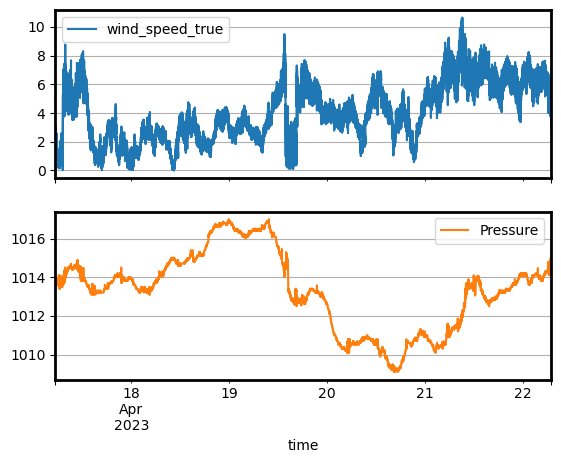

In [98]:
drix_met.to_pandas()[["wind_speed_true", "Pressure"]].plot(
    subplots=True, grid=True
)

In [99]:
drix_met["wind_speed_true"].hvplot()


:Curve   [time]   (wind_speed_true)

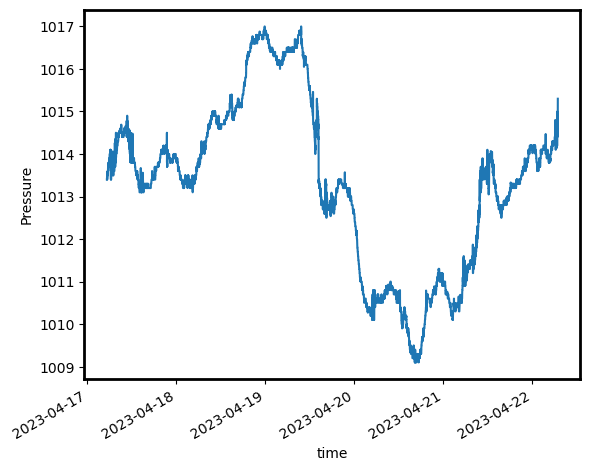

In [83]:
#europe.airpressure.plot(label="europe")
drix_met.Pressure.plot(label="pressure")

---
## underway overview

Text(0.5, 1.0, 'Drix surface salinity [psu]')

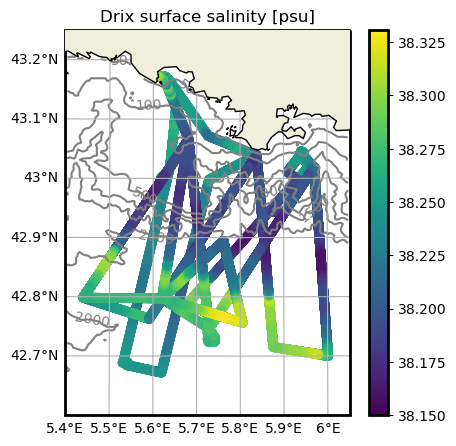

In [89]:
da = drix.salinity

#fac = pin.maps.plot_map(**kwargs_map, bathy_levels=cp.bathy["levels"])
#fig, ax = fac["fig"], fac["ax"]

fig, ax, _ = cp.map(figsize=(5,5))

im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmin=38.15)
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface salinity [psu]")

Text(0.5, 1.0, 'Drix surface temperature [degC]')

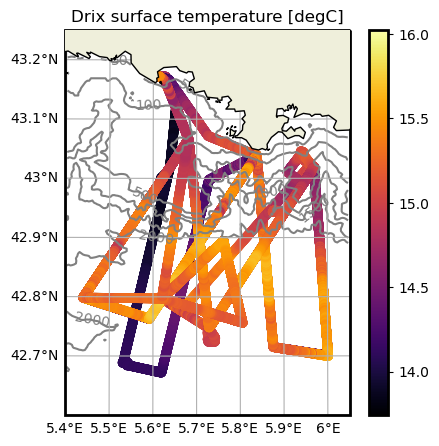

In [91]:
da = drix.temp

fig, ax, _ = cp.map(figsize=(5,5))

im = ax.scatter(da.lon, da.lat, c=da, transform=crs, cmap="inferno")
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface temperature [degC]")

Text(0.5, 1.0, 'Drix surface turbidity [1]')

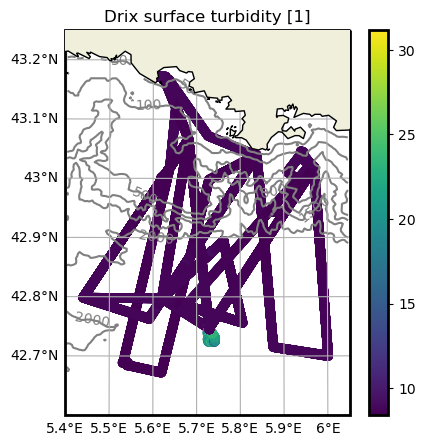

In [92]:
da = drix_turb.turbidity_low_range
da = drix_turb.turbidity_high_range

#da = np.log10(da)

fig, ax, _ = cp.map(figsize=(5,5))

#im = ax.scatter(da.lon, da.lat, c=da, transform=crs)
im = ax.scatter(da.lon, da.lat, c=da, transform=crs) #vmin=10, vmax = 17
#im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmax = 1.5)
#im = ax.scatter(da.lon, da.lat, c=da, transform=crs, vmin=-.1, vmax=0.1)
fig.colorbar(im, ax=ax)
ax.set_title("Drix surface turbidity [1]")

---

## movie


In [ ]:
kwargs_map

In [ ]:
def make_movie(
    cp,
    tstart,
    tend,
    drifters=None,
    ship=False,
    wind=None,
    ctd=None,
    bounds=None,
    istart=None,
    dt="10T",
    del_t="1H",  # trail behing ships
    wind_arrow_scale=1,
    wind_di=4,
    wind_offset=0,
):
    """Make a movie"""

    from tqdm import tqdm

    t_range = pd.date_range(tstart, tend, freq=dt)
    del_t = pd.Timedelta(del_t)

    _kwargs_map = dict(**kwargs_map)
    if isinstance(bounds, float):
        _kwargs_map["figsize"] = (7, 7)

    plt.switch_backend("agg")

    # fig_dir = os.path.join(cp.pathp, 'figs/')
    fig_dir = "/Users/aponte/tmp/figs/"

    europe_col = cp["adcp_europe"]["color"]
    drix_col = cp["adcp_drix"]["color"]

    i = -1
    for t in tqdm(t_range):
        i += 1

        if i < istart:
            continue

        _ds = europe.sel(time=t, method="nearest")
        if isinstance(bounds, float) and _ds.time.size > 0:
            _ds = europe.sel(time=t, method="nearest")
            lon, lat = float(_ds["lon"]), float(_ds["lat"])
            dlon = bounds / np.cos(lat * pin.deg2rad) * 0.5
            dlat = bounds * 0.5
            _kwargs_map["extent"] = [lon - dlon, lon + dlon, lat - dlat, lat + dlat]
        fac = pin.maps.plot_map(**_kwargs_map, bathy_levels=cp.bathy["levels"])
        fig, ax = fac["fig"], fac["ax"]
        # fig, ax, crs = cp.plot_map(figsize=(10,10), bounds=bounds,
        #                           coast="bseine", land=None, rivers="bseine",
        # )

        # ship
        if ship:
            # europe
            _ds = europe.sel(time=slice(t - del_t, t))
            ax.plot(
                _ds["lon"], _ds["lat"], lw=3, color=europe_col, alpha=1, transform=crs
            )
            ax.scatter(
                _ds["lon"][-1],
                _ds["lat"][-1],
                s=10,
                c="0.7",
                marker="o",
                edgecolors="k",
                linewidths=0.5,
                transform=crs,
                zorder=10,
            )
            # drix
            # _ds = drix.sel(time=slice(t-del_t,t))
            # ax.plot(_ds['lon'], _ds['lat'], lw=1, color=drix_col, alpha=.8, transform=crs)
            _ds = drix_ins.sel(time=slice(t - del_t, t))
            ax.plot(
                _ds["longitude"],
                _ds["latitude"],
                lw=1,
                color=drix_col,
                alpha=1,
                transform=crs,
            )
            if _ds.time.size > 0:
                ax.scatter(
                    _ds["longitude"][-1],
                    _ds["latitude"][-1],
                    s=10,
                    c="0.7",
                    marker="o",
                    edgecolors="k",
                    linewidths=0.5,
                    transform=crs,
                    zorder=10,
                )

        # wind
        if wind is not None:
            qkwargs = dict(
                scale=2e2 / wind_arrow_scale,
                width=2e-3 * wind_arrow_scale,
                transform=crs,
                zorder=1,
                add_guide=False,
            )
            #
            _di = wind_di
            _ds = wind.interp(time=t).isel(
                longitude=slice(0, None, _di), latitude=slice(0, None, _di)
            )
            q = _ds.plot.quiver(
                x="longitude", y="latitude", u="u10m", v="v10m", color="0.5", **qkwargs
            )
            qk = ax.quiverkey(
                q,
                0.1,
                0.9,
                10,
                "10 m/s",
                transform=crs,
                color="0.5",
                labelpos="W",
                coordinates="axes",
                zorder=100,
            )
            # europe wind
            _ds = europe.interp(time=t).expand_dims(dict(dum=2))
            _ds["wind_u_true"], _ds["wind_v_true"] = pin.speedheading2uv(
                _ds.trueairspeed, _ds.trueairheading
            )
            _ds["lat"] = _ds["lat"] + wind_offset
            q = _ds.plot.quiver(
                x="lon",
                y="lat",
                u="wind_u_true",
                v="wind_v_true",
                color=europe_col,
                **qkwargs,
            )
            # drix wind
            _ds = drix_met.interp(time=t).expand_dims(dict(dum=2))
            _ds["lat"] = _ds["lat"] + wind_offset
            q = _ds.plot.quiver(
                x="lon",
                y="lat",
                u="wind_u_true",
                v="wind_v_true",
                color=drix_col,
                **qkwargs,
            )

        # drifters
        if drifters is not None:
            # ids = dr.index.unique()
            ids = [
                u for u in cp if "0-435" in u
            ]  # prefered as if leads to correct color ordering in legend
            colors = pin.get_cmap_colors(len(ids))
            for idx, c in zip(ids, colors):
                df = dr.loc[idx]
                for d in df["deployment"].unique():
                    _df = (
                        df.loc[df.deployment == d]
                        .set_index("time")
                        .resample("1s")
                        .interpolate()
                    )
                    _df = _df.loc[t - del_t : t]
                    if _df.index.size > 0:
                        ax.plot(
                            _df.longitude,
                            _df.latitude,
                            color=c,  # cp[idx]["color"]
                            transform=crs,
                            label=f"{idx}, {d}",
                            lw=2,
                        )
                        ax.plot(
                            _df.longitude[-1],
                            _df.latitude[-1],
                            color=c,  # cp[idx]["color"]
                            marker="*",
                            markeredgecolor="k",
                            markeredgewidth=0.5,
                            transform=crs,
                            label=f"{idx}, {d}",
                            lw=2,
                            markersize=10,
                        )

        # add pool of isolated events

        # cp.add_legend(ax, loc=4, colors={idx: c for idx, c in zip(ids, colors)})
        ax.set_title(cp.name + "  " + str(t))

        figname = os.path.join(fig_dir, "fig_t%05d" % (i) + ".png")
        _ = fig.savefig(figname, dpi=150, facecolor="w")  # bbox_inches = 'tight'
        _ = fig.clf()


import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
part = "drifters"

# bounds, istart = None, 0,
bounds, istart = 0.25, 0
dt = "5T"

if part == "all":
    tstart = cp.start
    # tstart = '2022-05-11 05:00:00'
    tend = cp.end
    # dev
    # tstart = cp.start + pd.Timedelta("9H")
    # tend = cp.start + pd.Timedelta("10H") # dev
    # tend = '2022-05-13 10:00:00'
    # bounds = [-.3, .05, 49.25, 49.45]
elif part == "drifters":
    tstart = "2022-09-23 05:30:00"
    tend = "2022-09-23 16:10:00"
    bounds = 0.1
    dt = "30s"

kwargs = dict(
    drifters=dr,
    ship=True,
    wind=arome,
    bounds=bounds,
    istart=istart,
    dt=dt,
    del_t="1H",
)
kwargs.update(wind_arrow_scale=3, wind_di=2, wind_offset=0.02)

# dr = None
make_movie(cp, tstart, tend, **kwargs)

In [ ]:
def make_movie(
    cp,
    drifters=None,
    wind=None,
    istart=0,
):
    """Make a movie"""

    from tqdm import tqdm

    plt.switch_backend("agg")
    fig_dir = os.path.join(cp.pathp, "figs/")

    del_t = pd.Timedelta("2H")

    dl = 5e3
    xlims = (-dl, dl)
    ylims = (-dl, dl)

    i = -1
    for t in tqdm(drifters.time):
        i += 1

        if i < istart:
            continue

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        ds = drifters.sel(time=slice(t - del_t, t))

        # wind
        if wind is not None:
            _di = 2
            _ds = wind.interp(time=t).isel(
                longitude=slice(0, None, _di), latitude=slice(0, None, _di)
            )
            q = _ds.plot.quiver(
                x="longitude",
                y="latitude",
                u="u10m",
                v="v10m",
                scale=1e2,
                transform=crs,
                zorder=-2,
            )
            qk = ax.quiverkey(
                q,
                0.1,
                0.9,
                10,
                "10 m/s",
                transform=crs,
                color="r",
                labelpos="W",
                coordinates="axes",
                zorder=10,
            )

        # drifters
        # ids = dr.index.unique()
        ids = [
            u for u in cp if "0-435" in u
        ]  # prefered as if leads to correct color ordering in legend
        colors = pin.get_cmap_colors(len(ids))
        for idx, c in zip(ids, colors):
            _ds = ds.sel(id=idx)
            if _ds.time.size > 0:
                ax.plot(_ds.x_prime, _ds.y_prime, color=c, lw=2)

        ax.set_xlim(*xlims)
        ax.set_ylim(*ylims)
        ax.set_aspect("equal")
        ax.grid()

        cp.add_legend(ax, loc=4, colors={idx: c for idx, c in zip(ids, colors)})
        ax.set_title(cp.name + "  " + str(t.values))

        figname = fig_dir + "fig_t%05d" % (i) + ".png"
        _ = fig.savefig(figname, dpi=150, facecolor="w", bbox_inches="tight")
        _ = fig.clf()


import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
### taos0 - drifters0
bounds, istart = None, 0
if campaign == "taos0_drifters0":
    tstart = "2022-05-11 05:00:00"
    tend = "2022-05-11 09:00:00"
    # tend = '2022-05-13 10:00:00'
elif campaign == "taos0_drifters1":
    tstart = "2022-05-17 08:00:00"
    # tend = '2022-05-17 09:00:00'
    tend = "2022-05-19 13:30:00"
    # istart = 315

make_movie(cp, ds)